In [1]:
# import socket
# import pickle

# while True:
#     serverSock = socket.socket(socket.AF_INET, socket.SOCK_STREAM)
#     serverSock.setsockopt(socket.SOL_SOCKET, socket.SO_REUSEADDR, 1)
#     serverSock.bind(('', 9007))
#     serverSock.listen(1)

#     connectionSock, addr = serverSock.accept()

#     print(str(addr),'에서 접속이 확인되었습니다.')
    
#     data = connectionSock.recv(1024)
#     cmd = pickle.loads(data)
#     print('받은 데이터 : ', cmd)
    
#     serverSock.close()

In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer


In [3]:
def draw_img(x) :
  plt.figure()
  plt.imshow(x)
  plt.show()

In [4]:
(cx_train, cy_train), (cx_test, cy_test) = tf.keras.datasets.cifar100.load_data(label_mode="fine")
cx_train, cx_test = cx_train/255.0, cx_test/255.0

In [5]:
classes = [
#    'apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle',
#    'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel',
#    'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock',
#    'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur',
#    'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster',
#    'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion',
#    'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse',
#    'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear',
#    'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine',
#    'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose',
#    'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake',
#    'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table',
#    'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout',
#    'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman',
#    'worm'
# 구글 번역기로 위 내용을 한국어로 번역
    '사과', '수족관 물고기', '아기', '곰', '비버', '침대', '꿀벌', '딱정벌레',
    '자전거', '병', '그릇', '소년', '다리', '버스', '나비', '낙타',
    '캔', '성', '애벌레', '소', '의자', '침팬지', '시계',
    '구름','바퀴벌레','소파','게','악어','컵','공룡',
    '돌고래', '코끼리', '가자미','숲','여우','소녀','햄스터',
    '집', '캥거루', '키보드', '램프', '잔디깎기', '표범', '사자',
    '도마뱀', '랍스터', '사람', '매이플트리', '오토바이', '산', '마우스',
    '버섯', '오크트리', '오렌지', '난초', '수달', '팜트리', '배',
    '픽업트럭', '소나무', '평지', '접시', '양귀비', '호저',
    '주머니쥐', '토끼', '너구리', '레이', '도로', '로켓', '장미',
    '바다', '인감', '상어', '뒤쥐', '스컹크', '고층건물', '달팽이', '뱀',
    '거미', '다람쥐', '전차', '해바라기', '단고추', '테이블',
    '탱크', '전화', '텔레비전', '호랑이', '트랙터', '기차', '송어',
    '튤립', '거북이', '옷장', '고래', '버드나무', '늑대', '여자',
    '벌레'
]

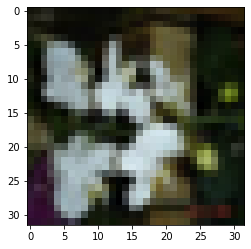

난초


In [6]:
idx = np.random.randint(0,9999)
draw_img(cx_test[idx])
print(classes[cy_test[idx][0]])

In [7]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(32,32,3)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv2D(32, kernel_size=(3, 3), kernel_initializer='he_uniform', activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.Conv2D(64, kernel_size=(3, 3), kernel_initializer='he_uniform', activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv2D(64, kernel_size=(3, 3), kernel_initializer='he_uniform', activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(100, activation='softmax'))
opt = tf.keras.optimizers.SGD(lr=0.01, momentum=0.9, decay=1e-6, nesterov=True)
model.compile(optimizer=opt, loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.summary()
tf.keras.utils.plot_model(model, show_shapes=True) # https://www.tensorflow.org/tutorials/images/segmentation?hl=ko

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 30, 30, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 28, 28, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                        

2022-05-13 00:20:12.990381: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-13 00:20:12.990786: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-13 00:20:12.991147: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-13 00:20:12.991571: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2022-05-13 00:20:12.991604: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic

In [8]:
# https://www.tensorflow.org/tensorboard/get_started?hl=ko
%load_ext tensorboard
import datetime
!rm -rf ./logs/
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

In [9]:
# history = model.fit(cx_train, cy_train, epochs=5)
# for tensorboard
history = model.fit(cx_train, cy_train, epochs=100, validation_data=(cx_test, cy_test), callbacks=[tensorboard_callback])
# 모델 저장, 훈련 후 다운로드를 받아두어야 나중에 업로드하여 재사용 가능함.
model.save("cifar100.h5")

Epoch 1/100
1563/1563 [==============================] - 48s 31ms/step - loss: 4.0616 - accuracy: 0.0897 - val_loss: 3.3955 - val_accuracy: 0.1850
Epoch 2/100
1563/1563 [==============================] - 44s 28ms/step - loss: 3.3560 - accuracy: 0.1959 - val_loss: 2.9103 - val_accuracy: 0.2798
Epoch 3/100
1563/1563 [==============================] - 43s 28ms/step - loss: 2.9648 - accuracy: 0.2650 - val_loss: 2.6065 - val_accuracy: 0.3344
Epoch 4/100
1563/1563 [==============================] - 43s 28ms/step - loss: 2.7417 - accuracy: 0.3069 - val_loss: 2.4247 - val_accuracy: 0.3718
Epoch 5/100
1563/1563 [==============================] - 43s 27ms/step - loss: 2.5822 - accuracy: 0.3387 - val_loss: 2.5017 - val_accuracy: 0.3588
Epoch 6/100
1563/1563 [==============================] - 41s 26ms/step - loss: 2.4575 - accuracy: 0.3649 - val_loss: 2.2004 - val_accuracy: 0.4224
Epoch 7/100
1563/1563 [==============================] - 42s 27ms/step - loss: 2.3773 - accuracy: 0.3817 - val_loss: 2

1563/1563 [==============================] - 39s 25ms/step - loss: 1.3874 - accuracy: 0.6024 - val_loss: 1.9666 - val_accuracy: 0.5075
Epoch 57/100
1563/1563 [==============================] - 41s 26ms/step - loss: 1.3631 - accuracy: 0.6089 - val_loss: 1.9742 - val_accuracy: 0.5042
Epoch 58/100
1563/1563 [==============================] - 41s 26ms/step - loss: 1.3550 - accuracy: 0.6104 - val_loss: 2.0555 - val_accuracy: 0.5015
Epoch 59/100
1563/1563 [==============================] - 41s 26ms/step - loss: 1.3516 - accuracy: 0.6134 - val_loss: 2.0465 - val_accuracy: 0.5071
Epoch 60/100
1563/1563 [==============================] - 41s 26ms/step - loss: 1.3502 - accuracy: 0.6132 - val_loss: 1.9705 - val_accuracy: 0.5148
Epoch 61/100
1563/1563 [==============================] - 41s 26ms/step - loss: 1.3464 - accuracy: 0.6141 - val_loss: 2.0041 - val_accuracy: 0.5065
Epoch 62/100
1563/1563 [==============================] - 40s 26ms/step - loss: 1.3379 - accuracy: 0.6143 - val_loss: 1.9643 